<a href="https://colab.research.google.com/github/darshanawijesingha/defected-cell-identification/blob/main/CNN_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>



**The context:** Why is this problem important to solve?<br>
Malaria is a global health issue that affects millions of people, particularly in regions with limited access to healthcare resources. Early and accurate detection of malaria is crucial for effective treatment and prevention of complications. However, traditional laboratory diagnosis methods for malaria are time-consuming, require specialized expertise, and may suffer from inter-observer variability. By developing an automated system for malaria detection using computer vision and deep learning techniques, we can significantly improve the speed, accuracy, and accessibility of diagnosis. This can lead to earlier detection, prompt treatment, and ultimately save lives.


**The objectives:** What is the intended goal?<br>
The goal of this project is to build a computer vision model using deep learning algorithms that can accurately identify and classify red blood cells as parasitized (infected with the Plasmodium parasite) or uninfected (free of the parasite). The model should provide a reliable and efficient tool for malaria detection, enabling early diagnosis and timely intervention.

**The key questions:** What are the key questions that need to be answered?<br>

1.   How can we leverage machine learning and artificial intelligence techniques to automate malaria detection?
2.   What are the key features or patterns in the images of red blood cells that can distinguish between infected and uninfected cells?
3.   Which deep learning algorithms and computer vision techniques are most suitable for this task?
4.   How can we evaluate the performance of the developed model in terms of accuracy, precision, recall, and other relevant metrics?


**The problem formulation:** What is it that we are trying to solve using data science?
Using data science, we aim to develop an efficient computer vision model that can accurately detect malaria by analyzing images of red blood cells. The model will be trained to differentiate between infected (parasitized) and uninfected red blood cells, based on visual patterns and features present in the images. The goal is to build a robust and reliable system that can automate the detection process, reducing the reliance on manual inspection and improving diagnostic accuracy. By leveraging machine learning and artificial intelligence techniques, we can enable early and accurate malaria diagnosis, particularly in resource-constrained areas where access to skilled healthcare professionals may be limited.




## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

## <b>Start of the Screening </b>

Follow the general steps below to achieve the objective of this project.

###<b> Mount the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -q "/content/drive/MyDrive/cell_images.zip"


Mounted at /content/drive


### <b>Loading libraries</b>

In [3]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np





### <b>Load and reformat the data</b>

In [4]:
# Define paths for train and test directories
data_dir = '/content/cell_images'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( )  # No normalization here
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # adjust size as needed
    batch_size=32,
    class_mode='binary',    # change to 'categorical' for multiple classes
    shuffle=True
)

# Load and preprocess test images without normalization
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator( )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # adjust size as needed
    batch_size=64,
    class_mode='binary',    # change to 'categorical' for multiple classes
    shuffle=False
)




Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


###<b> Check the shape of train and test images

In [5]:
num_train_samples = len(train_generator.filenames)
num_test_samples = len(test_generator.filenames)
class_names = ['Parasitized', 'Uninfected']
num_classes = len(class_names)

print("Number of classes:", num_classes)
print("Number of training samples:", num_train_samples)
print("Number of test samples:", num_test_samples)



Number of classes: 2
Number of training samples: 24958
Number of test samples: 2600


###<b> Check the shape of train and test labels

In [6]:
test_labels = test_generator.classes
test_filenames = test_generator.filenames

# Check the shape of test labels
print("Shape of test labels:", test_labels.shape)

# Display test filenames
print("Test filenames:", test_filenames)

train_labels = train_generator.classes
train_filenames = train_generator.filenames

# Check the shape of test labels
print("Shape of test labels:", train_labels.shape)

# Display test filenames
print("Test filenames:", train_filenames)

Shape of test labels: (2600,)
Test filenames: ['parasitized/C39P4thinF_original_IMG_20150622_105253_cell_105.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_106.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_107.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_108.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_109.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_92.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_93.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_94.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_95.png', 'parasitized/C39P4thinF_original_IMG_20150622_105253_cell_96.png', 'parasitized/C39P4thinF_original_IMG_20150622_105335_cell_10.png', 'parasitized/C39P4thinF_original_IMG_20150622_105335_cell_11.png', 'parasitized/C39P4thinF_original_IMG_20150622_105335_cell_19.png', 'parasitized/C39P4thinF_original_IMG_20150622_105335_cell_20.png', 'parasitiz

In [7]:
train_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### <b>Check the minimum and maximum range of pixel values for train and test images

In [8]:
# Load and preprocess train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Assuming binary classification
    shuffle=True
)

# Load and preprocess test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Get a batch of train images and test images
train_images_batch, _ = train_generator.next()
test_images_batch, _ = test_generator.next()

# Calculate the minimum and maximum pixel values
train_min_pixel_value = np.min(train_images_batch)
train_max_pixel_value = np.max(train_images_batch)
test_min_pixel_value = np.min(test_images_batch)
test_max_pixel_value = np.max(test_images_batch)

print("Minimum pixel value in train images:", train_min_pixel_value)
print("Maximum pixel value in train images:", train_max_pixel_value)
print("Minimum pixel value in test images:", test_min_pixel_value)
print("Maximum pixel value in test images:", test_max_pixel_value)


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.
Minimum pixel value in train images: 0.0
Maximum pixel value in train images: 255.0
Minimum pixel value in test images: 0.0
Maximum pixel value in test images: 227.0


###<b> Count the number of values in both uninfected and parasitized

In [9]:

# Count the number of images in both classes
num_uninfected_train = np.sum(train_generator.classes == 1)
num_parasitized_train = np.sum(train_generator.classes == 0)
num_uninfected_test = np.sum(test_generator.classes == 1)
num_parasitized_test = np.sum(test_generator.classes == 0)

print("Number of Uninfected images in train:", num_uninfected_train)
print("Number of Parasitized images in train:", num_parasitized_train)
print("Number of Uninfected images in test:", num_uninfected_test)
print("Number of Parasitized images in test:", num_parasitized_test)

Number of Uninfected images in train: 12376
Number of Parasitized images in train: 12582
Number of Uninfected images in test: 1300
Number of Parasitized images in test: 1300


###<b>Normalize the images

In [10]:

class_names = ['Parasitized', 'Uninfected']

batch_size = 32
image_size = (224, 224)  # Resize images to a common size

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Data normalization for test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification
    shuffle=True
)

# Load and preprocess test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [11]:

# Initialize an empty list to store the normalized test images
normalized_test_images = []


for batch_images, _ in test_generator:
    normalized_batch_images = batch_images / 255.0
    normalized_test_images.append(normalized_batch_images)
    if len(normalized_test_images) * test_generator.batch_size >= len(test_generator.filenames):
        break  # Stop when all images have been processed

# Concatenate the normalized batches
normalized_test_images = np.concatenate(normalized_test_images, axis=0)

# Create a new ImageDataGenerator with the normalized data and original labels
new_test_datagen = ImageDataGenerator()
new_test_generator = new_test_datagen.flow(normalized_test_images, test_generator.classes, batch_size=test_generator.batch_size)


###<b> Plot to check if the data is balanced

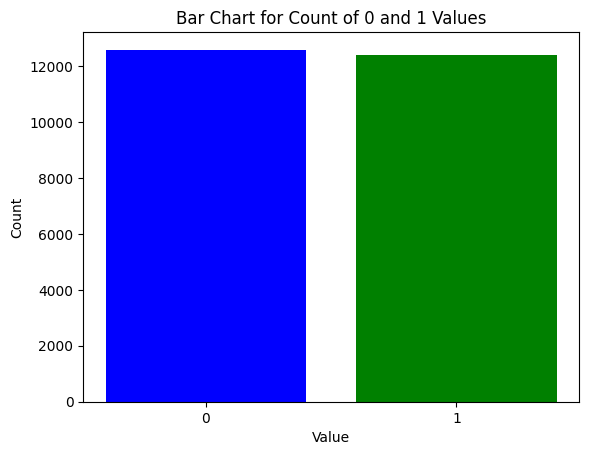

In [12]:
data=train_generator.classes
 # Count the occurrences of 0 and 1
count_0 = np.sum(data == 0)
count_1 = np.sum(data == 1)


# Create labels and counts for the bar chart
labels = ['0', '1']
counts = [count_0, count_1]

# Plot a bar chart
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Bar Chart for Count of 0 and 1 Values')
plt.show()

### <b>Data Exploration</b>
Visualize the images from the train data

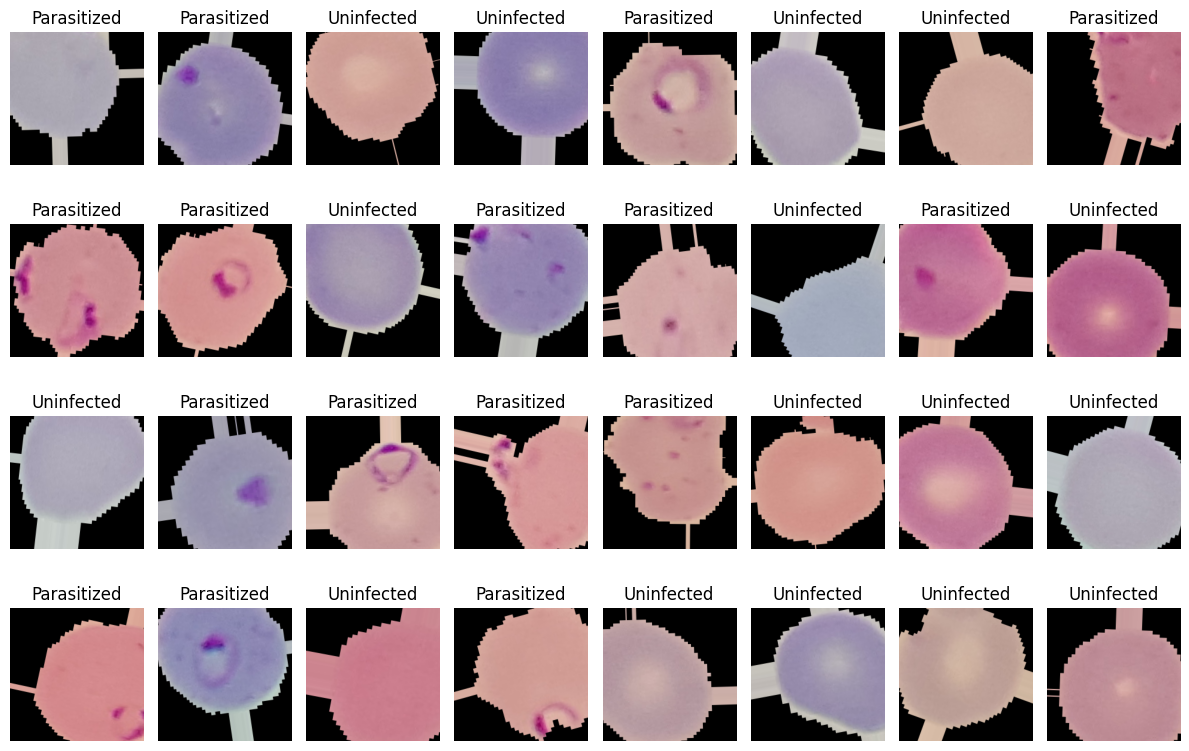

In [13]:



# Get a batch of images and their labels from the train generator
batch_images, batch_labels = train_generator.next()

# Plot the images
plt.figure(figsize=(12, 8))
for i in range(len(batch_images)):
    plt.subplot(4, 8, i + 1)
    plt.imshow(batch_images[i])
    plt.title(class_names[int(batch_labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

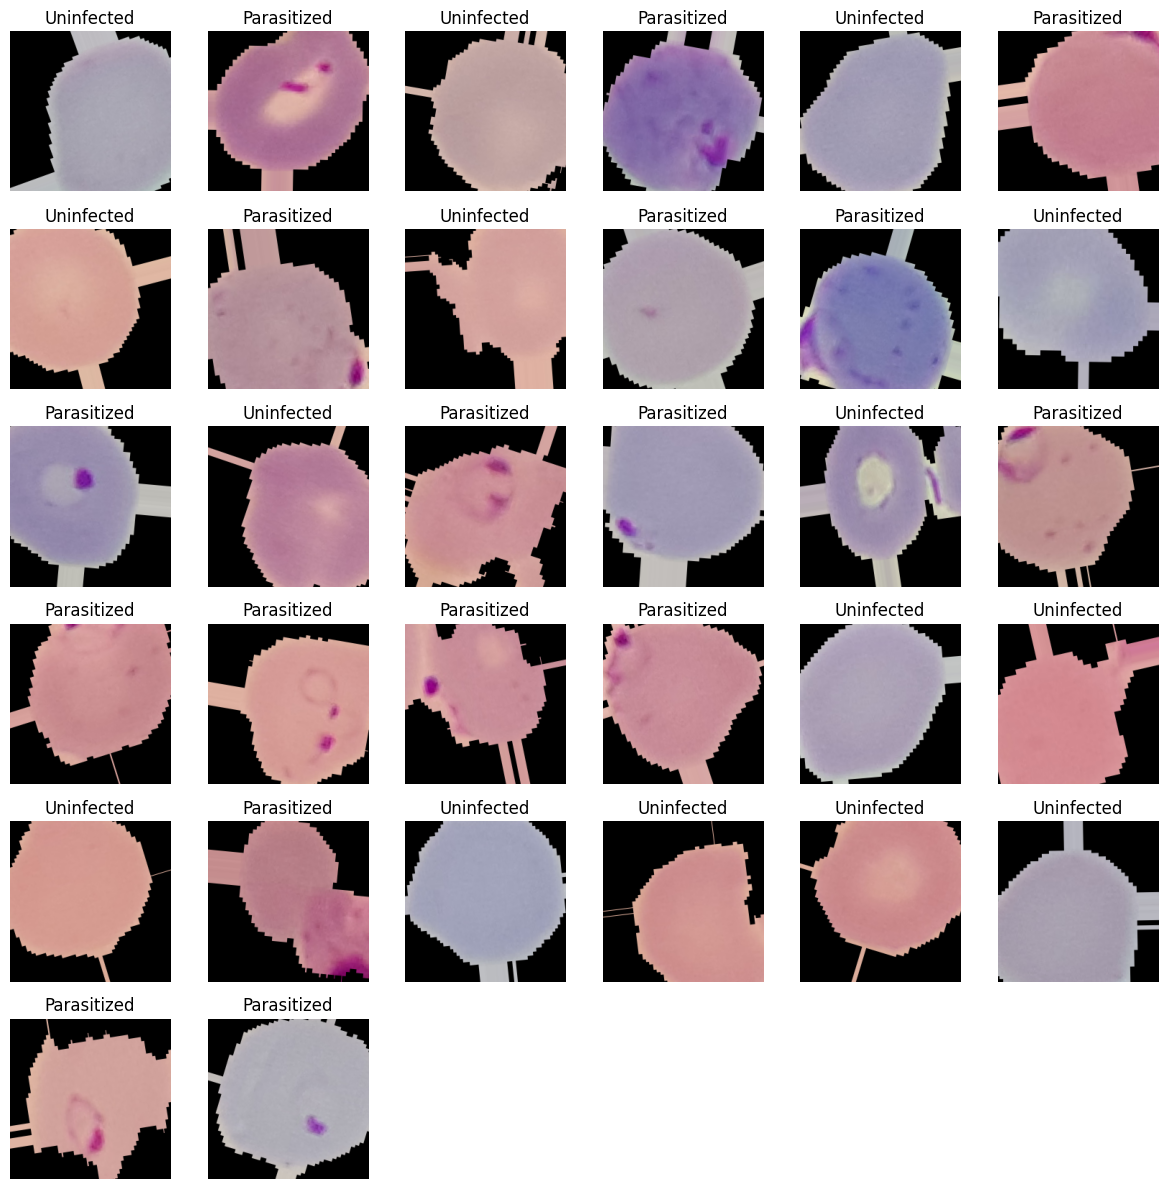

In [14]:
batch_images, batch_labels = train_generator.next()

# Plot the images
plt.figure(figsize=(12, 12))
for i in range(len(batch_images)):
    plt.subplot(6, 6, i + 1)
    plt.imshow(batch_images[i])
    plt.title(class_names[int(batch_labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

###<b> Plotting the mean images for parasitized and uninfected

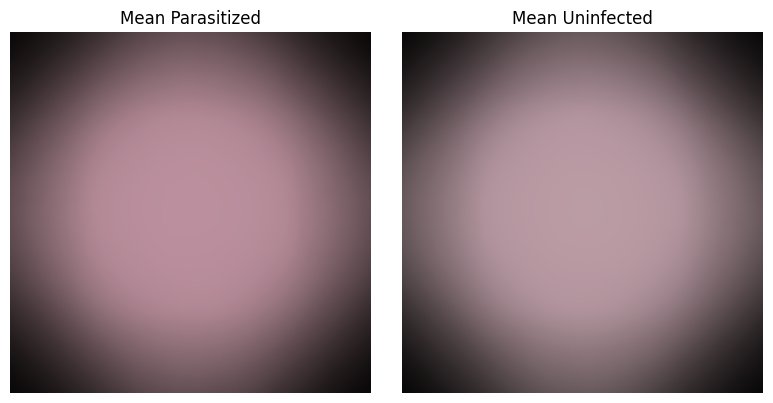

In [15]:
sum_parasitized = np.zeros(image_size + (3,))
count_parasitized = 0
sum_uninfected = np.zeros(image_size + (3,))
count_uninfected = 0

# Iterate through the train generator to calculate mean images
for batch_images, batch_labels in train_generator:
    for i in range(len(batch_images)):
        if batch_labels[i] == 0:  # Parasitized
            sum_parasitized += batch_images[i]
            count_parasitized += 1
        else:  # Uninfected
            sum_uninfected += batch_images[i]
            count_uninfected += 1
    if count_parasitized + count_uninfected >= num_train_samples:
        break  # Stop when all images have been processed

# Calculate mean images
mean_parasitized = sum_parasitized / count_parasitized
mean_uninfected = sum_uninfected / count_uninfected

# Plot the mean images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_parasitized)
plt.title('Mean Parasitized')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_uninfected)
plt.title('Mean Uninfected')
plt.axis('off')

plt.tight_layout()
plt.show()


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [16]:





import cv2
rgb_train = '/content/cell_images/train/'

# Directory to save the HSV images
hsv_train = '/content/cell_images/hsv_train/'

# Create the HSV directory if it doesn't exist
if not os.path.exists(hsv_train):
    os.makedirs(hsv_train)

# Loop through each image in the RGB directory
for rgb_filename in os.listdir(rgb_train):
    if rgb_filename.endswith('.jpg') or rgb_filename.endswith('.png'):
        # Load the RGB image
        rgb_image = cv2.imread(os.path.join(rgb_train, rgb_filename))

        # Convert RGB to HSV
        hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

        # Save the HSV image in the HSV directory
        hsv_filename = os.path.splitext(rgb_filename)[0] + '_hsv.jpg'
        hsv_filepath = os.path.join(hsv_train, hsv_filename)
        cv2.imwrite(hsv_filepath, hsv_image)



###<b> Converting the test data

In [17]:
rgb_test = '/content/cell_images/test/'

# Directory to save the HSV images
hsv_test = '/content/cell_images/hsv_test/'

# Create the HSV directory if it doesn't exist
if not os.path.exists(hsv_test):
    os.makedirs(hsv_test)

# Loop through each image in the RGB directory
for rgb_filename in os.listdir(rgb_train):
    if rgb_filename.endswith('.jpg') or rgb_filename.endswith('.png'):
        # Load the RGB image
        rgb_image = cv2.imread(os.path.join(hsv_test, rgb_filename))

        # Convert RGB to HSV
        hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

        # Save the HSV image in the HSV directory
        hsv_filename = os.path.splitext(rgb_filename)[0] + '_hsv.jpg'
        hsv_filepath = os.path.join(hsv_train, hsv_filename)
        cv2.imwrite(hsv_filepath, hsv_image)



###<b> Processing Images using Gaussian Blurring


###<b> Gaussian Blurring on train data

In [18]:
rgb_train = '/content/cell_images/train/'

# Directory to save the blurred images
blurred_dir = '/content/cell_images/blurred_train/'

# Create the blurred directory if it doesn't exist
if not os.path.exists(blurred_dir):
    os.makedirs(blurred_dir)

# Loop through each image in the RGB training directory
for rgb_filename in os.listdir(rgb_train):
    if rgb_filename.endswith('.jpg') or rgb_filename.endswith('.png'):
        # Load the RGB image
        rgb_image = cv2.imread(os.path.join(rgb_train, rgb_filename))

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(rgb_image, (5, 5), 0)

        # Save the blurred image in the blurred directory
        blurred_filename = os.path.splitext(rgb_filename)[0] + '_blurred.jpg'
        blurred_filepath = os.path.join(blurred_dir, blurred_filename)
        cv2.imwrite(blurred_filepath, blurred_image)

###<b> Gaussian Blurring on test data

In [19]:
rgb_test = '/content/cell_images/test/'

# Directory to save the blurred images
blurred_dir = '/content/cell_images/blurred_test/'

# Create the blurred directory if it doesn't exist
if not os.path.exists(blurred_dir):
    os.makedirs(blurred_dir)

# Loop through each image in the RGB test directory
for rgb_filename in os.listdir(rgb_test):
    if rgb_filename.endswith('.jpg') or rgb_filename.endswith('.png'):
        # Load the RGB image
        rgb_image = cv2.imread(os.path.join(rgb_test, rgb_filename))

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(rgb_image, (5, 5), 0)

        # Save the blurred image in the blurred directory
        blurred_filename = os.path.splitext(rgb_filename)[0] + '_blurred.jpg'
        blurred_filepath = os.path.join(blurred_dir, blurred_filename)
        cv2.imwrite(blurred_filepath, blurred_image)

## **Model Building**

### **Base Model**

**Note:** Build 3-5 models with  CNN architectures. Use custom or pretrained models of your choice. Start with a base model and continue from there

###<b> Importing the required libraries for building and training our base Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



####<B>One Hot Encoding the train and test labels

In [21]:
import tensorflow as tf

# Assuming you have train_labels and test_labels containing class indices
num_classes = 2  # Number of classes

train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes)
print(train_labels_encoded )

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


###<b> Building the model

In [22]:
# Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


# Display model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

###<b> Compiling the model

In [23]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

<b> Using Callbacks

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K

# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    # Adjust the learning rate based on epoch
    # Example: Reduce learning rate by a factor of 0.1 every 10 epochs
    if epoch % 10 == 0 and epoch != 0:
        return lr * 0.1
    return lr

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model.fit() call with callbacks
#history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, callbacks=[checkpoint, early_stopping],
                   # callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)])


In [25]:
# Define callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard,LearningRateScheduler


checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



<b> Fit and train our Model

In [26]:
# Fit and train the base model
history_model = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
     callbacks=[checkpoint, early_stopping,tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)])




Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
780/780 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.5231
Epoch 1: val_loss improved from inf to 0.68781, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


780/780 [==============================] - 343s 429ms/step - loss: 0.6963 - accuracy: 0.5231 - val_loss: 0.6878 - val_accuracy: 0.5415 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
780/780 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.6247
Epoch 2: val_loss improved from 0.68781 to 0.47516, saving model to best_model.h5
780/780 [==============================] - 343s 439ms/step - loss: 0.6295 - accuracy: 0.6247 - val_loss: 0.4752 - val_accuracy: 0.8269 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
780/780 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8792
Epoch 3: val_loss improved from 0.47516 to 0.23283, saving model to best_model.h5
780/780 [==============================] - 341s 437ms/step - loss: 0.3422 - accuracy: 0.8792 - val_loss: 0.2328 - val_accuracy: 0.9469 - lr: 0.0010

Epoch 4: LearningRateScheduler setting 

###<b> Evaluating the model on test data

In [27]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



82/82 [==============================] - 5s 63ms/step - loss: 0.2505 - accuracy: 0.8904
Test Accuracy: 89.04%


In [28]:
test_generator

<b> Plotting the confusion matrix

In [29]:
# Plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



In [30]:
import seaborn as sns

In [31]:
from sklearn.metrics import confusion_matrix

82/82 [==============================] - 5s 64ms/step


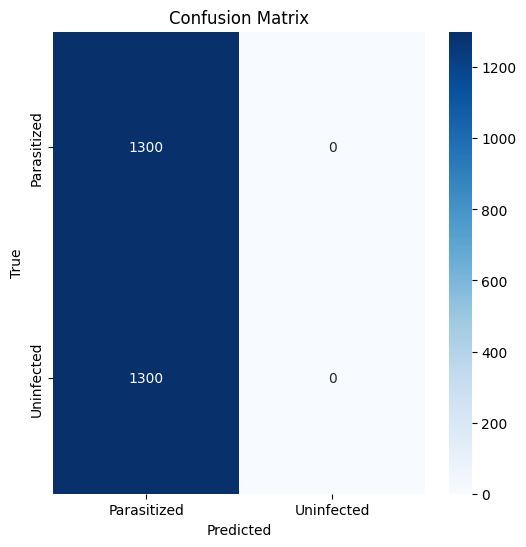

In [32]:
test_predictions = model.predict(test_generator)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded test labels back to integers
test_true_classes = np.argmax(test_labels_encoded, axis=1)

# Plot confusion matrix
plot_confusion_matrix(test_true_classes, test_predictions_classes, class_names)



<b>Plotting the train and validation curves

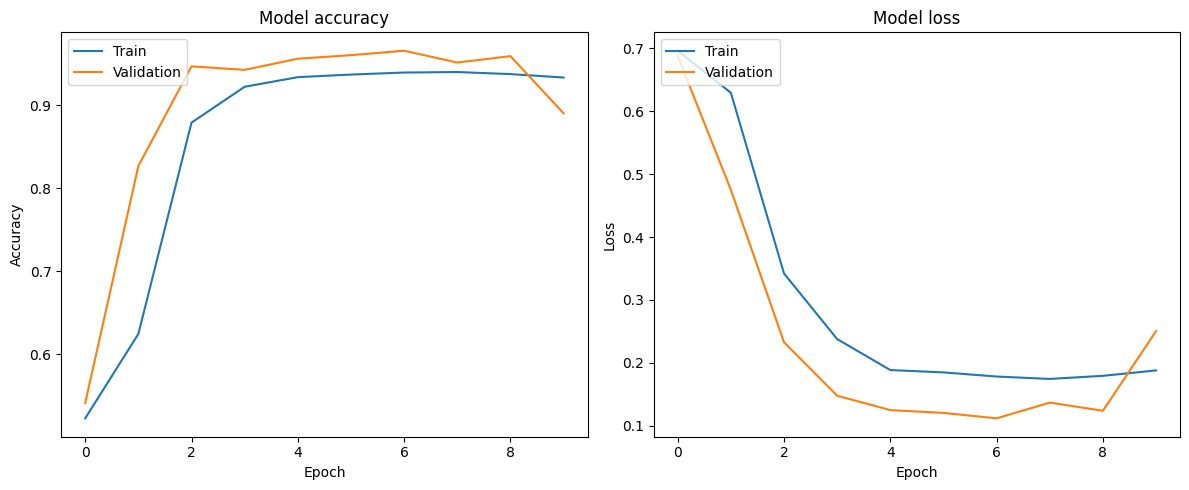

In [33]:
# Plotting the train and validation curves
def plot_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training and validation curves for the base model
plot_curves(history_model)
